In [427]:
%%capture
%pip install kmodes

%pip install seaborn
%pip install plotly

%pip install yellowbrick

In [428]:
# Data wrangling
import numpy as np
import pandas as pd

# Dataviz
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

import string

In [429]:
df = pd.read_csv(r"C:\Users\Shiry\OneDrive\Área de Trabalho\Git Hub\projetos\MODELOS-DE-CLUSTERIZA--O\IGR.csv", delimiter=";", on_bad_lines="skip")


C:\Users\Shiry\AppData\Local\Temp\ipykernel_18644\3858203688.py:1: DtypeWarning:

Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.



In [430]:
df.head()

,REGISTRO_ANS,RAZAO_SOCIAL,COBERTURA,IGR,QTD_RECLAMACOES,QTD_BENEFICIARIOS,PORTE_OPERADORA,COMPETENCIA,COMPETENCIA_BENEFICIARIO,DT_ATUALIZACAO
0,27,MASSA FALIDA DE SALUTAR SAÚDE SEGURADORA S.A.,assistencia medica,0,0,2,Pequeno,202409,202408,07/10/2024
1,477,SUL AMERICANAA SEGURADORA DE SAUDE S.A,assistencia medica,"131,35",52,39589,Médio,202409,202408,07/10/2024
2,515,ALLIANZ SAÚDE S/A,assistencia medica,0,0,337,Pequeno,202409,202408,07/10/2024
3,582,PORTO SEGURO - SEGURO SAÚDE S/A,assistencia medica,"49,93",303,606829,Grande,202409,202408,07/10/2024
4,582,PORTO SEGURO - SEGURO SAÚDE S/A,Exclusivamente odontológica,"1,59",15,942240,Grande,202409,202408,07/10/2024


In [431]:
# Remover registros onde 'PORTE_OPERADORA' é igual a 'pequeno'
df = df[df['PORTE_OPERADORA'] != 'pequeno']




In [432]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132559 entries, 0 to 132558
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   REGISTRO_ANS              132559 non-null  int64 
 1   RAZAO_SOCIAL              132559 non-null  object
 2   COBERTURA                 132559 non-null  object
 3   IGR                       132559 non-null  object
 4   QTD_RECLAMACOES           132559 non-null  int64 
 5   QTD_BENEFICIARIOS         132559 non-null  int64 
 6   PORTE_OPERADORA           132559 non-null  object
 7   COMPETENCIA               132559 non-null  int64 
 8   COMPETENCIA_BENEFICIARIO  132559 non-null  int64 
 9   DT_ATUALIZACAO            70440 non-null   object
dtypes: int64(5), object(5)
memory usage: 10.1+ MB


In [433]:
df['IGR'] =df['IGR'].str.replace(',','.').astype(float)

In [434]:
df.head()

,REGISTRO_ANS,RAZAO_SOCIAL,COBERTURA,IGR,QTD_RECLAMACOES,QTD_BENEFICIARIOS,PORTE_OPERADORA,COMPETENCIA,COMPETENCIA_BENEFICIARIO,DT_ATUALIZACAO
0,27,MASSA FALIDA DE SALUTAR SAÚDE SEGURADORA S.A.,assistencia medica,0.00,0,2,Pequeno,202409,202408,07/10/2024
1,477,SUL AMERICANAA SEGURADORA DE SAUDE S.A,assistencia medica,131.35,52,39589,Médio,202409,202408,07/10/2024
2,515,ALLIANZ SAÚDE S/A,assistencia medica,0.00,0,337,Pequeno,202409,202408,07/10/2024
3,582,PORTO SEGURO - SEGURO SAÚDE S/A,assistencia medica,49.93,303,606829,Grande,202409,202408,07/10/2024
4,582,PORTO SEGURO - SEGURO SAÚDE S/A,Exclusivamente odontológica,1.59,15,942240,Grande,202409,202408,07/10/2024


In [435]:
colunas_drop =['COBERTURA','DT_ATUALIZACAO','PORTE_OPERADORA', 'RAZAO_SOCIAL','COMPETENCIA','COMPETENCIA_BENEFICIARIO','REGISTRO_ANS','IGR']

for col in colunas_drop:
    df=df.drop(columns=[col])

In [436]:
df.describe()

,QTD_RECLAMACOES,QTD_BENEFICIARIOS
count,132559.000000,1.325590e+05
mean,12.182824,6.525260e+04
std,110.346518,3.099818e+05
min,0.000000,1.000000e+00
25%,0.000000,2.770000e+03
50%,0.000000,1.066500e+04
75%,2.000000,3.457100e+04
max,5132.000000,7.977292e+06


In [437]:
df.head()

,QTD_RECLAMACOES,QTD_BENEFICIARIOS
0,0,2
1,52,39589
2,0,337
3,303,606829
4,15,942240


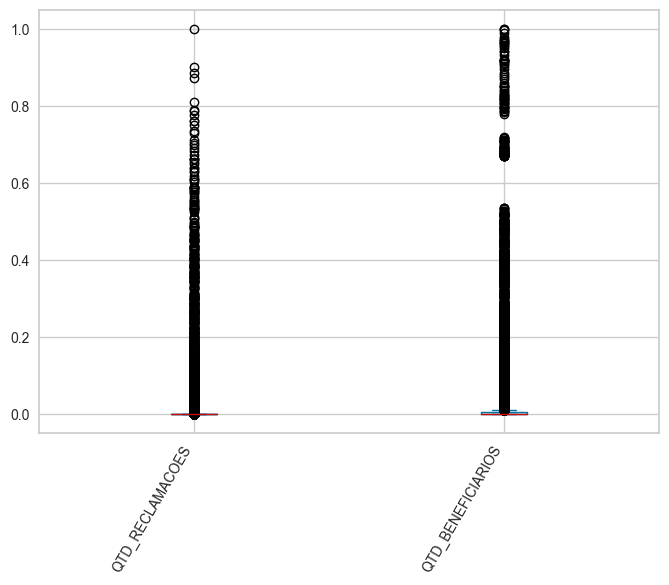

In [438]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Supondo que 'df' seja o seu DataFrame
scaler = MinMaxScaler()

# Converta o DataFrame para um array numpy
df_scaled = scaler.fit_transform(df.values)

# Se você quiser manter o DataFrame com os mesmos nomes de colunas
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

# Agora você pode continuar com a visualização
df_scaled.plot.box()
plt.xticks(rotation=60, ha='right')
plt.show()


In [439]:
df_scaled.describe()

,QTD_RECLAMACOES,QTD_BENEFICIARIOS
count,132559.000000,132559.000000
mean,0.002374,0.008180
std,0.021502,0.038858
min,0.000000,0.000000
25%,0.000000,0.000347
50%,0.000000,0.001337
75%,0.000390,0.004334
max,1.000000,1.000000


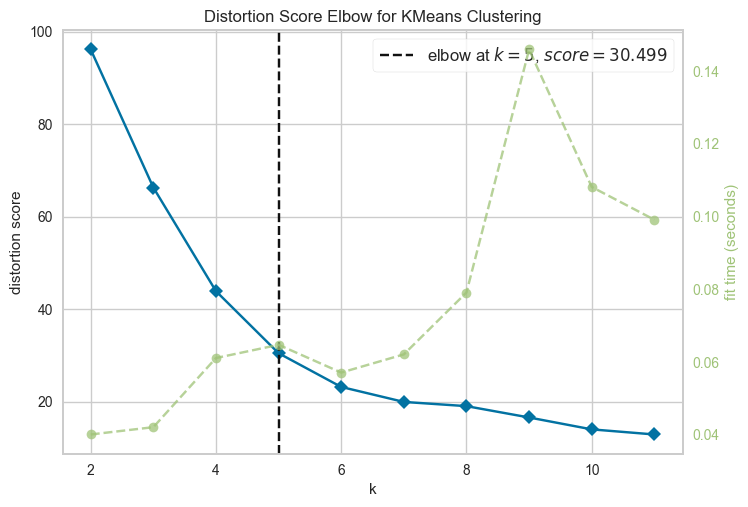

In [440]:
kelbow_visualizer(KMeans(), df_scaled, k=11);

In [445]:
modelo = KMeans(6,random_state=0).fit(df_scaled)

In [446]:
centroids = modelo.cluster_centers_
labels = modelo.labels_

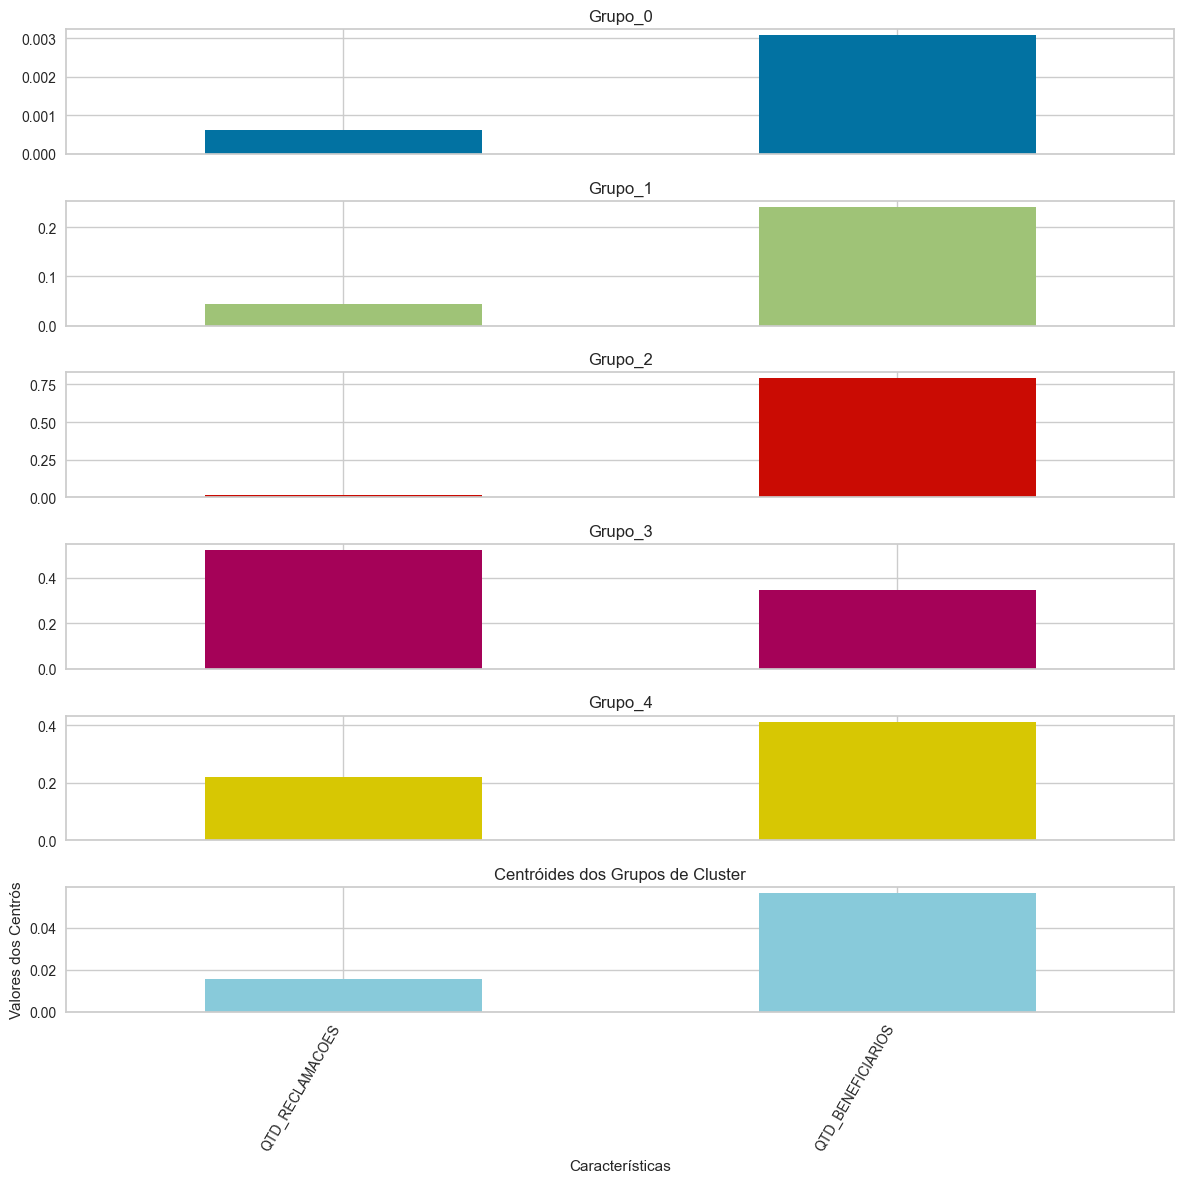

In [447]:
(
  pd.DataFrame(centroids, columns=df_scaled.columns).T.add_prefix('Grupo_')
  .plot.bar(subplots=True, figsize=(12,12), legend=False)
)
plt.title('Centróides dos Grupos de Cluster')
plt.ylabel('Valores dos Centrós')
plt.xlabel('Características')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()


plt.show()

c:\Users\Shiry\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names



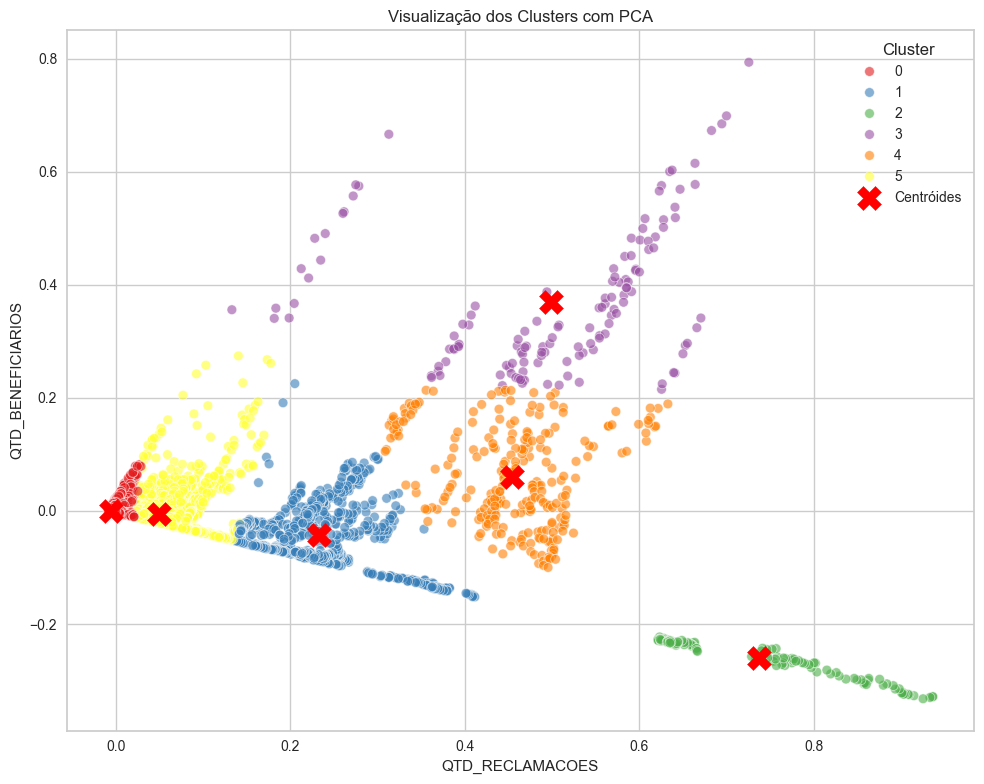

In [448]:
# Redução de dimensionalidade
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)


# Criar um DataFrame com as componentes principais e os rótulos dos clusters
df_pca = pd.DataFrame(data=df_pca, columns=['QTD_RECLAMACOES', 'QTD_BENEFICIARIOS'])
df_pca['Cluster'] = labels  


centroids = modelo.cluster_centers_
centroids_pca = pca.transform(centroids)  
centroids_df = pd.DataFrame(centroids_pca, columns=['QTD_RECLAMACOES', 'QTD_BENEFICIARIOS'])
centroids_df['Cluster'] = range(len(centroids_df))  

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca, x='QTD_RECLAMACOES', y='QTD_BENEFICIARIOS', palette='Set1', hue='Cluster', alpha=0.6)


# Plotar os centróides


plt.scatter(centroids_df['QTD_RECLAMACOES'], centroids_df['QTD_BENEFICIARIOS'], 
 s=300, c='red', marker='X', label='Centróides')

plt.title('Visualização dos Clusters com PCA')
plt.xlabel('QTD_RECLAMACOES')
plt.ylabel('QTD_BENEFICIARIOS')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

